# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!



In [1]:
# Importing a Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
df = pd.read_csv('ecomm.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
# Rename the columns

df = df.rename(columns = {'Avg. Session Length':'Avg Length','Time on App':'App Time','Time on Website':'Website Time','Length of Membership':'Membership Length','Yearly Amount Spent':'Annual Spent'})

In [8]:
df.head()

,Email,Address,Avatar,Avg Length,App Time,Website Time,Membership Length,Annual Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis [EDA]

**Lets Explore the data!!**</br>
For the rest of the data we'll only be using the numerical data...

__Use seaborn to create a jointplot to compare the Website Time and Annual Spent.
Does the correlation make sense?__

In [9]:
# # Set the theme
# sns.set_palette('GnBu_d')
# sns.set_style('whitegrid')

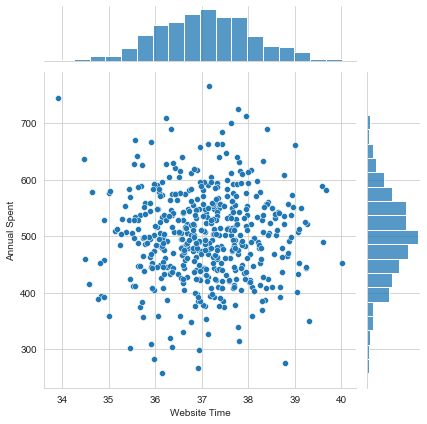

In [12]:
# Sns Jointplot
sns.jointplot(x='Website Time', y = 'Annual Spent',data = df)


**Lets do this again with App Time and Annual Spent.**

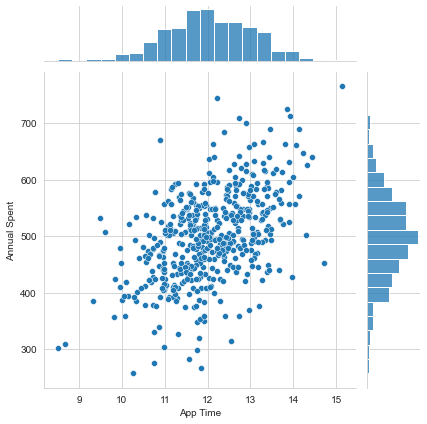

In [13]:
sns.jointplot(x = 'App Time', y = 'Annual Spent', data = df)

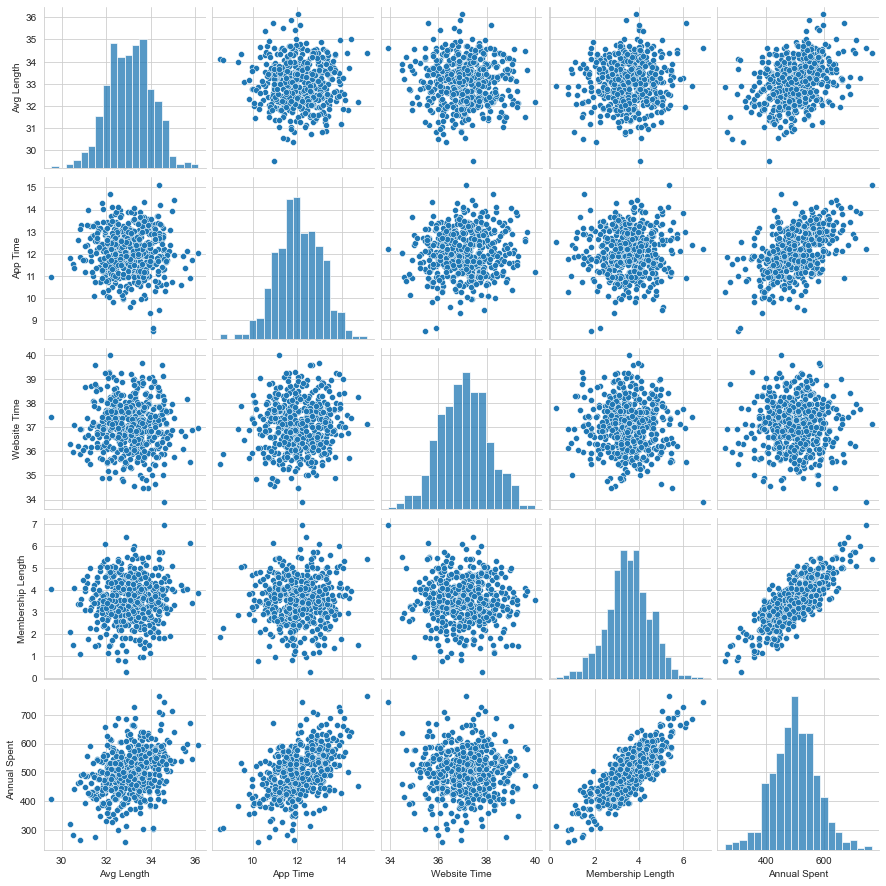

In [14]:
## Explore all types of relationships using pairplot
sns.pairplot(df)




_Based on this plot it looks like Membership Length is the most correlated feature with Annual Spent._


#### Now Create a linear model plot (using lmplot) of Annual Spent VS Membership Length

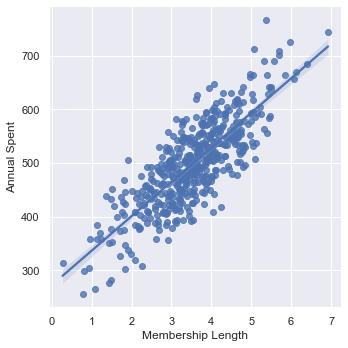

In [16]:
sns.set(color_codes = True)
sns.lmplot(x = 'Membership Length', y = 'Annual Spent',data = df)

_Yeah, It looks good correlated with each other._

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X **(Independent Feature)** equal to the numerical features of the customers and a variable y **(Dependent Feature)** equal to the "Annual Spent" column.

In [22]:
X = df.iloc[:,3:7]  # Independent variable ----> All Numeric Columns

In [21]:
y = df.iloc[:,-1]   # Dependent Variable ---> Annual Spent

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
print("Shape of training feature", X_train.shape)
print("Shape of testing feature", X_test.shape)
print("Shape of training label", y_train.shape)
print("Shape of testing label", y_test.shape)

Shape of training feature (400, 4)
Shape of testing feature (100, 4)
Shape of training label (400,)
Shape of testing label (100,)


## Training the Model

Now its time to train our model on our training dataset.

In [26]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create an object
reg = LinearRegression()

In [27]:
# Fitting the data
reg.fit(X_train,y_train)

LinearRegression()

In [28]:
print("Coefficient =",reg.coef_)
print("Intercept =",reg.intercept_)

Coefficient = [25.88815047 38.87046475  0.47066153 61.78369021]
Intercept = -1060.5508094278791


## Predicting Test Data

Lets Evaluate the performance of our model by predicting the test values.

In [29]:
pred = reg.predict(X_test)

In [30]:
pred

array([438.46488047, 489.66184564, 370.06954182, 513.85905556,
       495.69799866, 450.8872651 , 458.01303781, 336.66556242,
       528.51544937, 663.27832045, 559.42244853, 526.02431269,
       552.20571726, 457.67586172, 450.15607806, 431.65097992,
       563.58511639, 408.3544021 , 599.61853974, 486.84826713,
       716.6549357 , 496.79327179, 411.49845257, 556.55139415,
       551.84576823, 398.18338567, 421.30757533, 395.15395631,
       548.52797689, 463.48718367, 558.43909629, 505.52726975,
       505.87531576, 463.94575681, 425.98372415, 401.07293147,
       503.60337935, 430.34122807, 569.63274312, 421.89472102,
       487.26750643, 602.37423872, 616.44671936, 589.39491743,
       449.73449164, 379.9261546 , 558.17328323, 462.72008778,
       502.16865431, 401.43462335, 523.84624179, 416.80395458,
       576.87121949, 478.50455228, 457.24801922, 397.67512997,
       564.86978027, 305.13130975, 562.63197549, 476.33492261,
       499.04418084, 433.98746398, 463.72067778, 576.91

**Create a scatterplot of the real test values VS the predicted values.**

Text(0.5, 0, 'Actual')

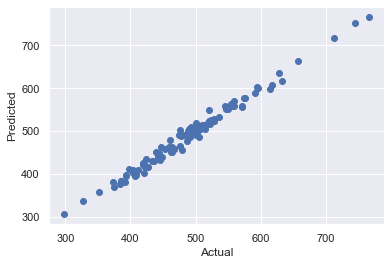

In [33]:
plt.scatter(y_test,pred)
plt.ylabel('Predicted')
plt.xlabel('Actual')

In [38]:
new_df = pd.DataFrame({'Actual':y_test,'Predicted':pred, 'Difference':pred-y_test})

In [39]:
new_df

,Actual,Predicted,Difference
90,449.070319,438.464880,-10.605439
254,482.602467,489.661846,7.059378
283,374.269675,370.069542,-4.200133
445,513.153112,513.859056,0.705944
461,502.771075,495.697999,-7.073076
...,...,...,...
372,385.152338,383.744509,-1.407829
56,520.898795,524.168193,3.269398
440,499.140152,500.682688,1.542536
60,616.851523,606.787827,-10.063696


**_As We can see that this model is working very nice... So much close predictions.._**

### Evaluating the Model

Let's evaluate our model performance by calculating the R2 score.

**Calculate the Mean Absolute Error, Mean Squared Error and the Root Mean Square Error.**

In [41]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

print('MAE: {}'.format(metrics.mean_absolute_error(y_test,pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test,pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,pred))))

print('R square (R^2): ',r2_score(y_test,pred))

MAE: 7.645674815886416
MSE: 92.89010330488274
RMSE: 9.637951198511162
R square (R^2):  0.9861924261590184


_So by seeing the R2 which is approx. 1 considering very very good model for our predictions..._

### Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed.</br> Use either seaborn distplot or just plt.hist().**

<AxesSubplot:xlabel='Annual Spent', ylabel='Density'>

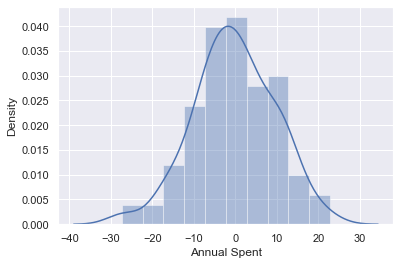

In [43]:
sns.distplot((y_test-pred))

### Conclusion

We still want to figure out the answer to the original question, do we focus our effort on mobile app or website development? 

In [44]:
pd.DataFrame(reg.coef_,X.columns, columns={'Coefficent'})

,Coefficent
Avg Length,25.888150
App Time,38.870465
Website Time,0.470662
Membership Length,61.783690


**_Note_**: _The greater the coeff. value the more related it is to the target, in this case 'Annual Spent'._



Question: Do you think the company should focus more on their mobile app or their website?


_The company should focus on the **mobile app**._